<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Homework 12: Data Visualization

_Instructor:_ Tim Book

_Student Name:_ Pragat Basnet   

# Problem 0: Imports
Read in our 3 favorite libraries here, plus any more you might need.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Problem 1: Old Faithful
Read in `faithful.csv`, a dataset recording eruptions of the Old Faithful geyser in Yellowstone National Park. It consists of only two columns:

* `duration`: The duration of the eruption (in minutes)
* `waiting`: The time to next eruption (in minutes)

### 1a
Read in the data.

In [2]:
faith = pd.read_csv('data/faithful.csv')


In [3]:
faith

,duration,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85
...,...,...
267,4.117,81
268,2.150,46
269,4.417,90
270,1.817,46


### 1b
Create a new column called `group`, which is a string of:

* Your favorite color, if `duration` is less than 3
* Your second favorite color otherwise

For example, maybe they would be `"blue"` and `"orange"`.

* _Hint:_ The `np.where()` function might be useful here.

In [4]:
faith['group']= np.where(faith['duration'] < 3, 'blue','red')

In [5]:
faith

,duration,waiting,group
0,3.600,79,red
1,1.800,54,blue
2,3.333,74,red
3,2.283,62,blue
4,4.533,85,red
...,...,...,...
267,4.117,81,red
268,2.150,46,blue
269,4.417,90,red
270,1.817,46,blue


### 1c
Create a **scatterplot** of `duration` vs `waiting` with the following characteristics:

* The points are colored based on your `group` variable.
* The axes are appropriately labeled.
* The points are little stars (_hint:_ Set `marker` to `*`).
* Make the points larger so you can tell they're stars.

**_You must use pandas, and not matplotlib, to do this problem!_** That is, your plot should be generated from code like:

```python
faithful.plot(...)
```

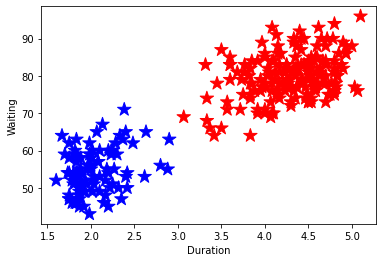

In [6]:
faith.plot(kind = 'scatter', x = 'duration', y = 'waiting', color = faith['group'], marker = '*', s = 200)
plt.xlabel('Duration')
plt.ylabel('Waiting');

# Problem 2: Fijian Earthquakes
Next, we have data collected on earthqukes in Fiji.

Create a scatterplot with longitude on the x-axis, and latitude on the y-axis. Your graph should also have the following characteristics:

* Set the transparency on the points to a reasonable level.
* The points should be black.
* Set the size of the points to _ten times_ the earthquake's magnitude.
* Give the axes appropriate labels.

**_You must use matplotlib to create this plot, not pure pandas!_** That is, your plot should be generated from code starting like this:

```python
fig, ax = plt.subplots(...)
```

In [7]:
fijian = pd.read_csv('data/quakes.csv')

In [8]:
fijian


,lat,long,depth,mag,stations
0,-20.42,181.62,562,4.8,41
1,-20.62,181.03,650,4.2,15
2,-26.00,184.10,42,5.4,43
3,-17.97,181.66,626,4.1,19
4,-20.42,181.96,649,4.0,11
...,...,...,...,...,...
995,-25.93,179.54,470,4.4,22
996,-12.28,167.06,248,4.7,35
997,-20.13,184.20,244,4.5,34
998,-17.40,187.80,40,4.5,14


In [10]:
#For me its easier name a row with variables
x = fijian['long']
y = fijian['lat']

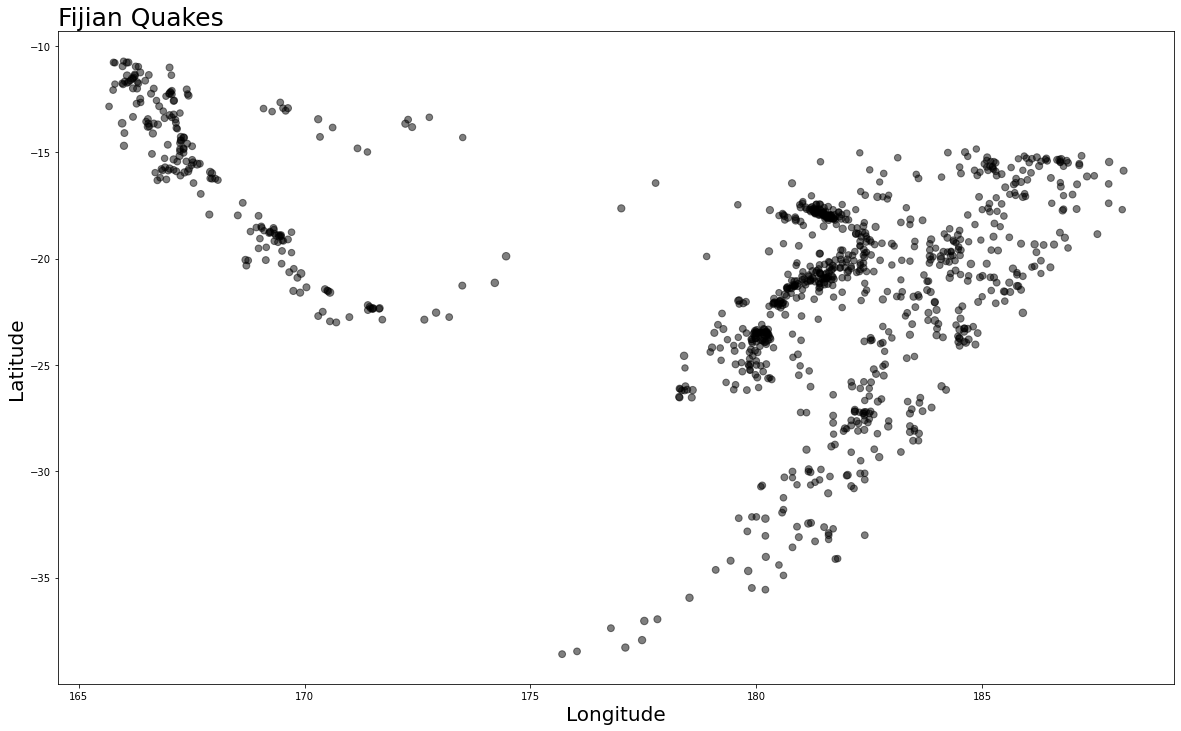

In [11]:
fig, axs = plt.subplots(figsize = (20,12))
plt.scatter(x, y, alpha = 0.5, c = 'black', s = fijian['mag'] * 10)
plt.xlabel('Longitude', size = 20)
plt.ylabel('Latitude', size = 20)
plt.title('Fijian Quakes', loc='left', size = 25);



# Problem 3: Repeat After Me
Read in `sbux.csv` which represents stock data for Starbucks (SBUX) over a period of 1 month.

Your mission is simple: reproduce this graph as closely as you can:

![](imgs/sbux.png)

Here are some details you might need:
* The colors used are "aliceblue" and "navy"
* The plot is 14 by 6
* The thick blue line is the stock's closing price on that date
* The light blue ribbon plot is the range between the stock's high and low price on that date
* You'll want to officially cast the date column as a `pandas` datetime

_Hint:_ Check out the `fill_between()` plot.

In [12]:
sbux = pd.read_csv('data/sbux.csv')

In [19]:
date = sbux['date']
low= sbux['low']
high=sbux['high']
close = sbux['close']

In [20]:
sbux['date']=pd.to_datetime(date)

Text(0, 0.5, 'Price (USD)')

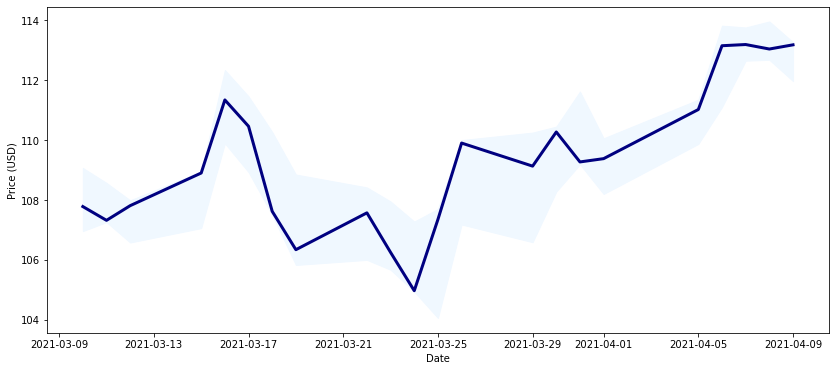

In [21]:
fig, axs = plt.subplots(figsize = (14,6))
axs.plot(date, close, color = 'navy', linewidth = 3)
axs.fill_between(date, low, high, color = 'aliceblue')
plt.xlabel("Date")
plt.ylabel("Price (USD)")